In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [30, 15]

In [9]:
df = pd.read_excel("C:\\Users\\ZM\\Desktop\\CODE\\DATA SCIENCE\\tivlon\\futures\\DCE Iron Ore Datas.xls", skiprows=[1], skipfooter=1)
df.dropna(how="all", inplace=True)
df.columns=["date", "price", "closing", "vol", "oi"]
df = df[(df['date'] >= '2018-1-1')]

In [56]:
df["price %chg"] = (df["price"].pct_change(1)*100).round(2)

df["vol %chg"] = (df["vol"].pct_change(1)*100).round(2)
df["vol sma"] = df["vol"].rolling(5).mean()
df["vol std"] = df["vol"].rolling(5).std().round(2)
df["vol std chg"] = (df["vol"] - df["vol"].rolling(10).mean()) / df["vol"].rolling(10).std()

df["oi %chg"] = (df["oi"].pct_change(1)*100).round(2)
df["oi sma"] = df["oi"].rolling(5).mean()

print(df.tail(5))

           date  price  closing        vol         oi  price %chg  vol %chg  \
1388 2019-06-26  795.5    804.0  2646276.0  1609492.0       -1.30     44.65   
1389 2019-06-27  821.5    821.5  3016596.0  1714706.0        3.27     13.99   
1390 2019-06-28  833.5    838.5  2351208.0  1774126.0        1.46    -22.06   
1391 2019-07-01  855.5    873.0  2142258.0  1778972.0        2.64     -8.89   
1392 2019-07-02  886.5    900.0  2766620.0  1719956.0        3.62     29.15   

        vol sma    vol std  vol std chg  oi %chg     oi sma  vol std chg ma  
1388  2650684.4  494585.43     0.015573    -3.02  1771168.4        0.419464  
1389  2632697.2  475114.61     0.554965     6.54  1724972.8        0.477974  
1390  2559420.0  486856.38    -0.622834     3.47  1702998.4        0.247089  
1391  2397157.6  456930.25    -1.019157     0.27  1707365.6        0.144058  
1392  2584591.6  344127.17     0.121745    -3.32  1719450.4        0.126176  


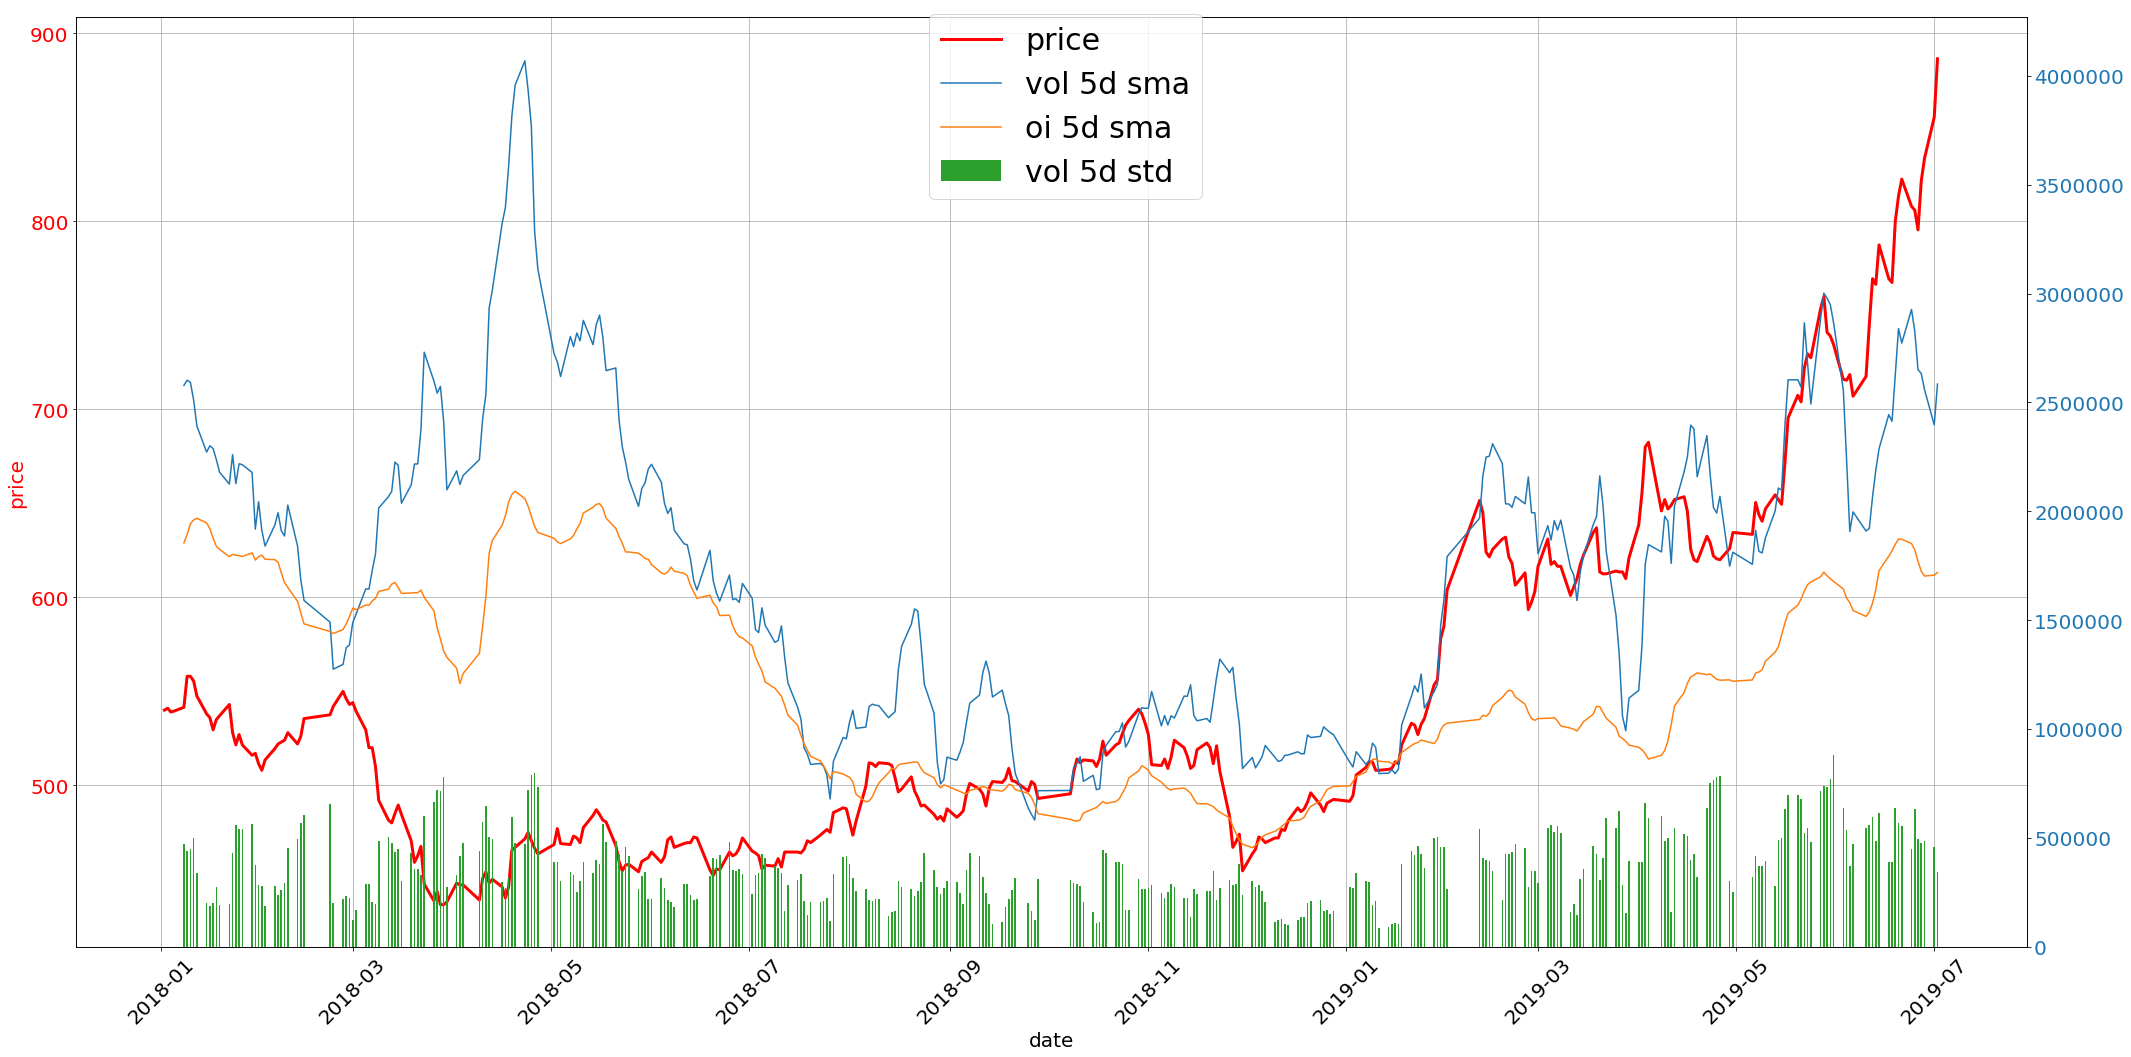

In [54]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)

color="red"
ax1.set_xlabel('date')
ax1.set_ylabel('price', color=color)
ax1.plot(df["date"], df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color="tab:blue"
ax2.plot(df["date"], df["vol sma"], color=color, label="vol 5d sma")
ax2.plot(df["date"], df["oi sma"], color="tab:orange", label="oi 5d sma")
plt.bar(df["date"], df["vol std"], color="tab:green", label="vol 5d std", width=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

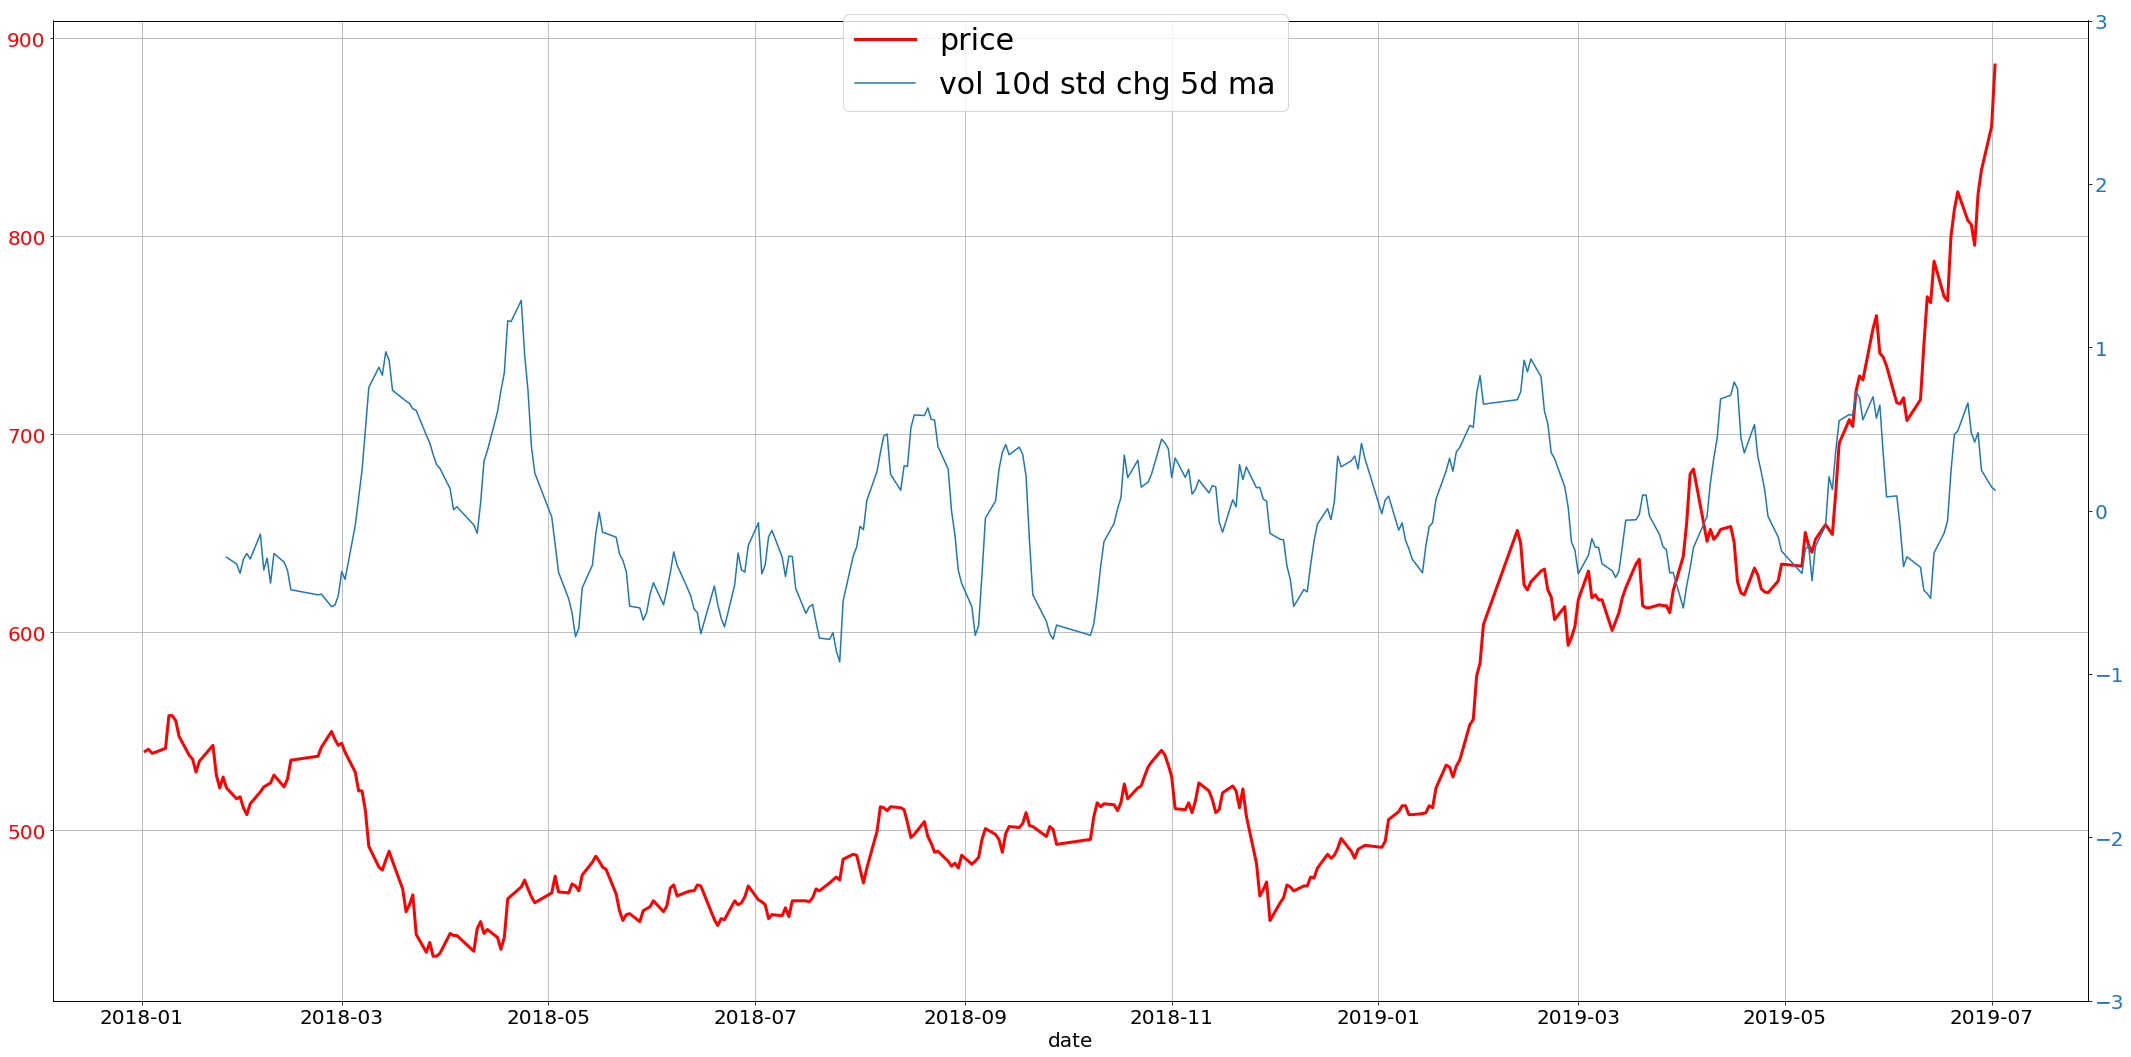

In [49]:
fig, ax1 = plt.subplots()

color="red"
ax1.set_xlabel('date')
ax1.plot(df["date"], df["price"], color=color, linewidth=3, label="price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color="tab:blue"
df["vol std chg ma"] = df["vol std chg"].rolling(10).mean()
ax2.plot(df["date"], df["vol std chg ma"], color=color, label="vol 10d std chg 5d ma")
#ax2.plot(df["date"], df["oi %chg"], color="tab:orange", label="oi %chg")
axes = plt.gca()
axes.set_ylim([-3,3])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()

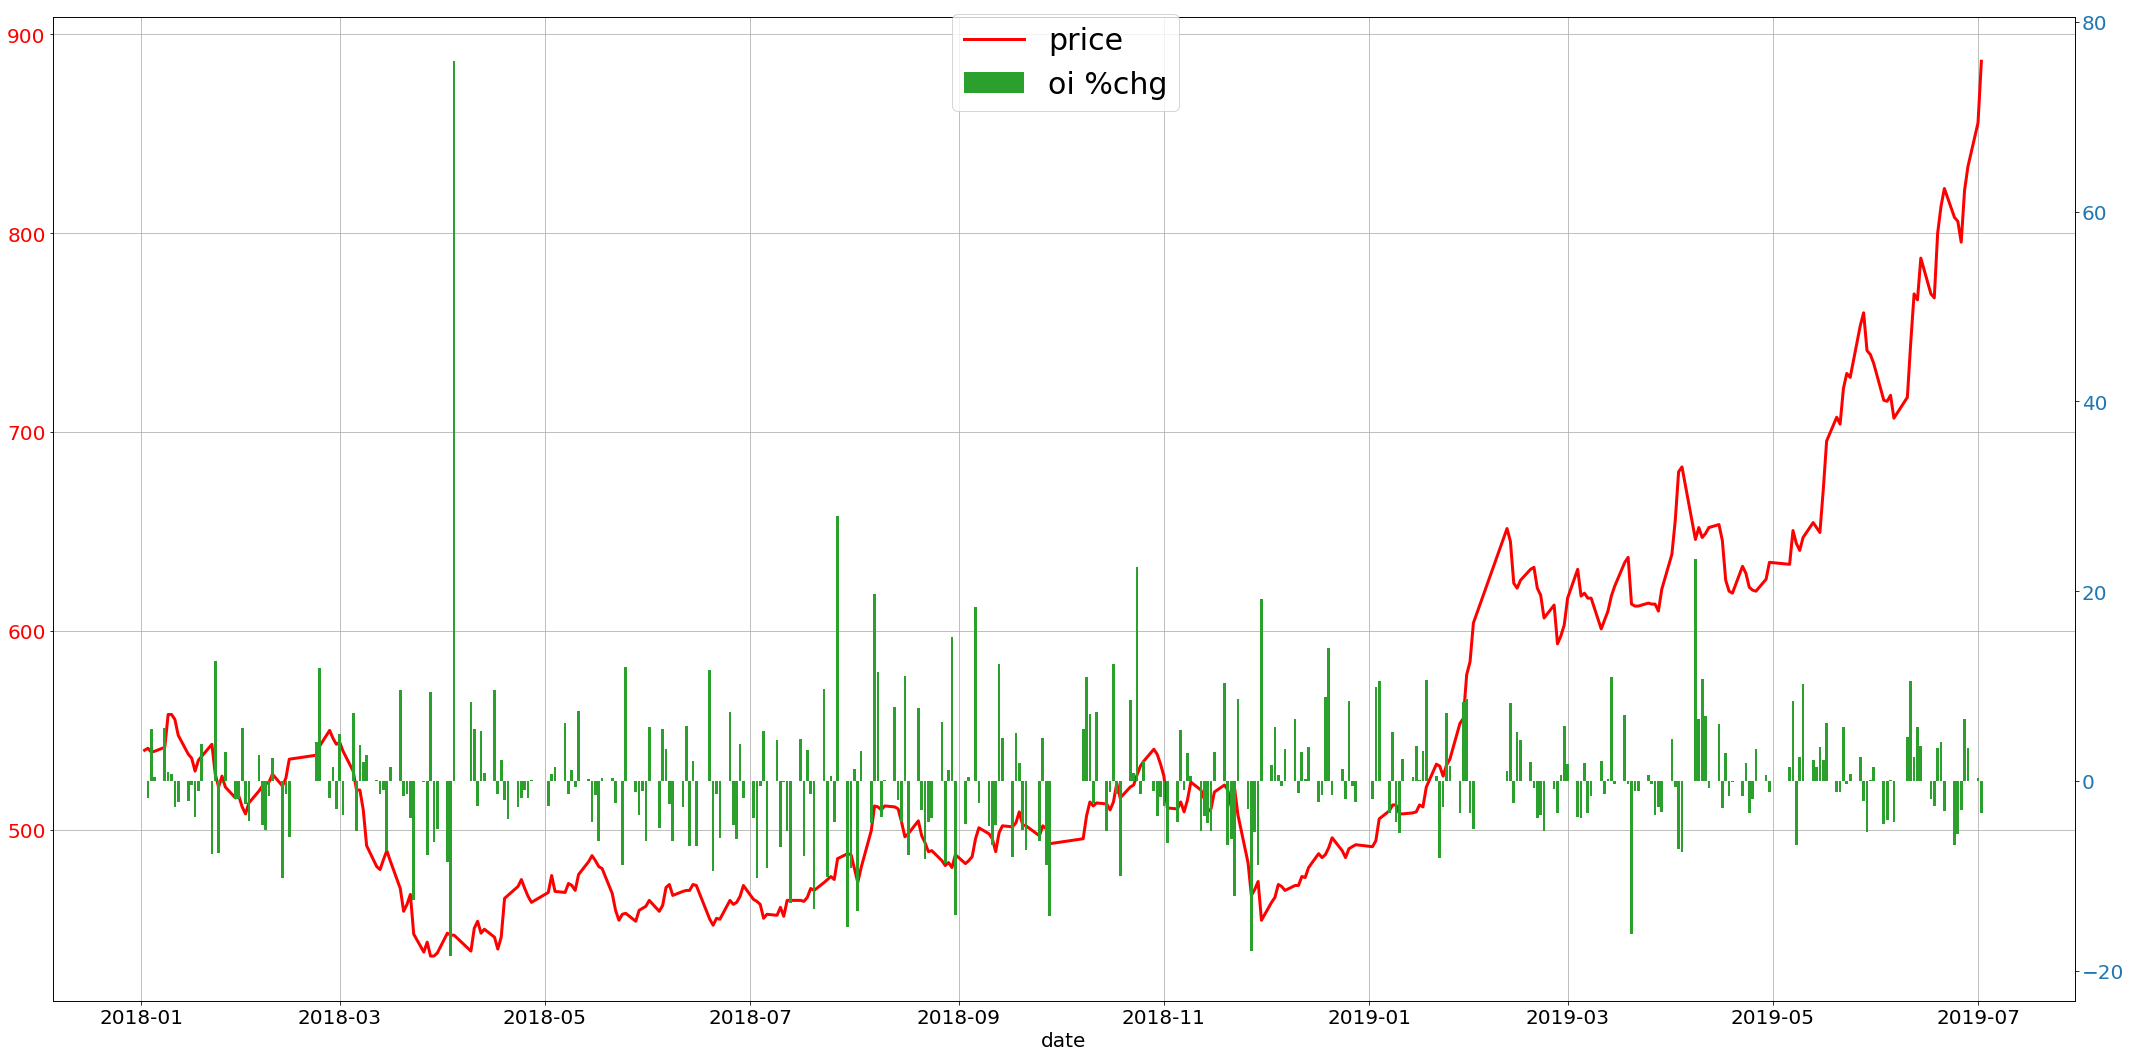

In [47]:
fig, ax1 = plt.subplots()

color="red"
ax1.set_xlabel('date')
ax1.plot(df["date"], df["price"], color=color, linewidth=3, label="price")
#ax1.bar(df["date"], df["vol %chg"], color="tab:orange", label="vol %chg")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color="tab:blue"
ax2.bar(df["date"], df["oi %chg"], color="tab:green",  label="oi %chg")
#ax2.bar(df["date"], df["vol %chg"], color="tab:orange", label="vol %chg")
axes = plt.gca()
#axes.set_ylim([-5,5])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=9, prop={'size': 30})
plt.show()


#plt.plot(df["date"], df["price %chg"], color="red",  label="price %chg")
#plt.bar(df["date"], df["vol %chg"],  color="tab:orange", label="vol %chg")
#plt.plot(df["date"], df["oi %chg"], color="tab:green",  label="oi %chg")
#plt.bar(df["date"], df["vol std chg"], color="tab:blue",  label="vol 10d std chg")